In [1]:
import gc
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
loandata = pd.read_csv("./training set/ts_label.csv")

In [5]:
X = loandata.drop("target", axis = 1)
y = loandata[["target"]]

/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


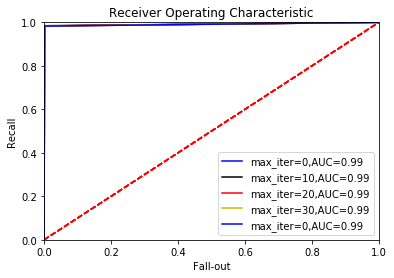

In [7]:
pred_list = []
color = ['b','k','r','y','green']

# Traing Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Model
rfc = RandomForestClassifier(n_estimators=50,max_depth=50,n_jobs=-1)
rfc.fit(X_train, y_train)

# Prediction
pred = rfc.predict(X_test)

pred_list.append(pred)

# ROC
false_positive_rate, recall, thresholds = roc_curve(y_test, pred)
roc_auc=auc(false_positive_rate,recall)
plt.title('Receiver Operating Characteristic')
plt.plot(figsize=(12,18))
plt.plot(false_positive_rate, recall, color[i], label='max_iter=%s,AUC=%0.2f' % (10*i,roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
    
plt.show()

In [8]:
#predict score
scores = cross_val_score(rfc,y_test,pred,cv=2,scoring='precision')
print ('Accuracy：', np.mean(pred), scores)

Accuracy： 0.0971306180658 [ 0.9826269   0.98296128]


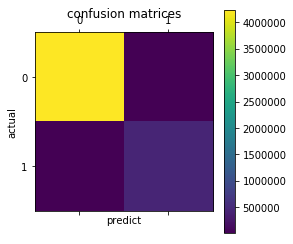

In [9]:
# Confusion Matrix
confusion_matrix=confusion_matrix(y_test,pred)
plt.matshow(confusion_matrix)
plt.title('confusion matrices')
plt.colorbar()
plt.ylabel('actual')
plt.xlabel('predict')
plt.show()